# Linear Regression with OLS

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv('datasets/weight-height.csv')

print(df.head(3))
print(df.shape)

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
(10000, 3)


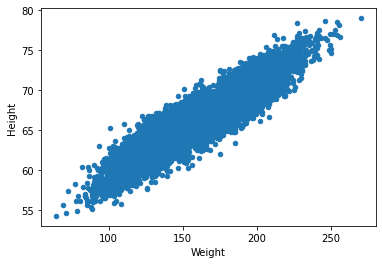

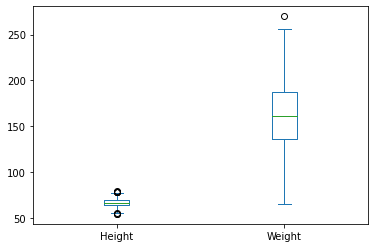

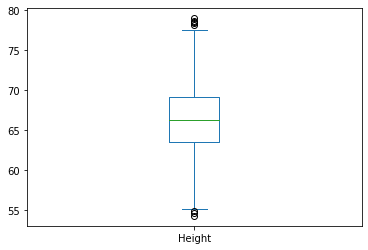

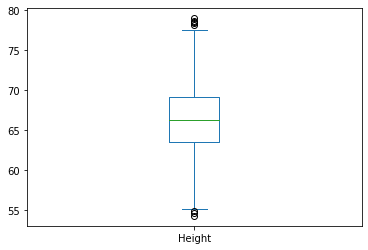

In [3]:
df.plot(kind='scatter', 
        x='Weight', 
        y='Height'
       )

df.plot(kind='box')
df.plot(kind='box', x='Weight')
df.plot(kind='box', y='Height')

plt.show()

In [4]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [5]:
weight = pd.DataFrame(df['Weight'])
height = pd.DataFrame(df['Height'])

In [6]:
#building Linear regression model (LRM)

lm = linear_model.LinearRegression()

#height = weight*b1 + b0

model_lm = lm.fit(weight, height)
model_lm

LinearRegression()

In [7]:
print('The intercept is \t :\t', model_lm.intercept_)
print('The coefficients are \t : \t', model_lm.coef_)
print('Model score (R-squared) is : \t', model_lm.score(weight, height))

The intercept is 	 :	 [48.47790261]
The coefficients are 	 : 	 [[0.11081279]]
Model score (R-squared) is : 	 0.8551742120609958


In [8]:
#alternative 
#height = weight*b1 + b0

model_ols = sm.OLS.from_formula("height ~ weight", data=df)
result = model_ols.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:18:52   Log-Likelihood:                -18002.
No. Observations:               10000   AIC:                         3.601e+04
Df Residuals:                    9998   BIC:                         3.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.4779      0.075    645.773      0.000      48.331      48.625
weight         0.1108      0.000    242.975      0.000       0.110       0.112
==============================================================================
Omnibus:                        4.617   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.615
Skew:                          -0.053   Prob(JB):                       0.0995
Kurtosis:                       3.000   Cond. No.                         844.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#predition  #height = weight*b1 + b0

new_weight = pd.DataFrame([200]) #height ? 
predict_height = model_lm.predict(new_weight)

predict_height


array([[70.64046158]])

In [10]:
x = ([200, 201, 94])
x = pd.DataFrame(x)

y = model_lm.predict(x)
y = pd.DataFrame(y)

df_new = pd.concat([x,y], 
                   axis=1, 
                   keys=['new_weight', 'predict_height'])
df_new

,new_weight,predict_height
,0,0
0,200,70.640462
1,201,70.751274
2,94,58.894305


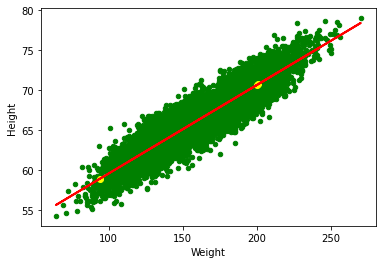

In [12]:
df.plot(kind='scatter', 
        x='Weight', 
        y='Height',
       color = 'g')

plt.plot(weight, 
         model_lm.predict(weight), 
         color='red', 
         linewidth=2)

plt.scatter(x,
            y, 
            color = 'yellow')#the predictions

plt.show()